# SF1626 Lecture highlights: Chapter 14
by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

Lecture 1: 14.1, 14.2

Lecture 2: 14.3, 14.4

Lecture 3: 14.5, 14.6, 14.7


**You need to know what a Riemann sum is, and how to use it to define integration**

### Riemann Sum

Objective: Approximate the volume between the graph of $f(x,y)$ and the $x$-$y$ plane. Volume can be negative if $f(x,y)<0$.

Defined by 

* A rectangular domain $D$
* An *integrant* $f(x,y)$ (a function to integrate in the rectangular domain)
* A partition, $P$, of a rectangular  domain $D$

**Riemann sum**: 
($f$ is approximated by some step functions, for which "integration" is identical to summation)

$$ R(f, P) := \sum_{i=1}^{m}\sum_{j=1}^n~f(x_{i,j}^*,y_{i,j}^*)~\Delta A_{i,j},$$

* $(x_{i,j}^*,y_{i,j}^*)$ is an arbitrary point in the subrectangle, $R_{i,j}$, whose lower left corner is grid node $(i,j)$
* In each of the sub-rectangles, $f(x,y)$ is approximated by a constant = $f(x_{i,j}^*,y_{i,j}^*)$
* $\Delta A_{i,j}$ is the area of that rectangle


### Integrability 

**Definition 1**: (p817)  

$f$ is **integrable** over $D$ if there is a number denoted by

$$ I=\int\int_D f(x,y)dA $$

such that for **every $\epsilon>0$, there exists $\delta(\epsilon)>0$**

$$|R(f,P)-I|<\epsilon$$ 

for **every partition of $D$** satisfying $||P||<\delta(\epsilon)$, and 

for **all choices of the points $(x_{i,j}^*,y_{i,j}^*)$**

$$ ||P|| := \max~~\mathrm{(R}_{i,j}) :=\max_{i,j} \sqrt((x_i-x_{i-1})^2+(y_j-y_{j-1})^2) $$


**You need to know how to define integration of a function in a domain which is not a square**

In [16]:
function RiemannSum(f, M, N; uniform_mesh=true, random_selection=false)
   
    # create a partition of the [0,1]x[0,1] domain
    if uniform_mesh
        x=range(0, stop=1, length=M+1)
        y=range(0, stop=1, length=N+1)
    else   
        x=[0.0; sort(rand(M))]
        y=[0.0; sort(rand(N))]
    end
    
    sum =0.0
    
    fval=0.0
    
    for j=2:N+1
        Δy=y[j]-y[j-1]
        for i=2:M+1
                Δx=x[i]-x[i-1]
            
                if random_selection
                    fval=f( x[i-1]+rand()*Δx, y[j-1]+rand()*Δy )
                else
                    fval=f(x[i]-Δx/2,y[j]-Δy/2)
                end
            
                # in this implementation, we choose the "mid-point" of each rectangle to evaluate f
                sum+= fval*Δx*Δy
        end
    end
    
    return sum
end


RiemannSum (generic function with 1 method)

In [2]:
f(x,y)= exp(x^2+y^2)

f3(x,y) = ( (x-0.5)^2+(y-0.5)^2 <0.3^2 ? f(x,y) : 0.0)

f4(x,y)=1/(x^2+y^2)

f5(x,y)=1/sqrt(x^2+y^2)

f5 (generic function with 1 method)

In [2]:
using PyPlot

In [ ]:
using LinearAlgebra

X = repeat( range(0, stop=1, length=201), 1, 201)
Y = copy(X')

surf(X, Y, f3.(X,Y))
xlabel("x")
ylabel("y")

In [20]:
m=100*2 .^[1; 2; 3; 4; 5; 6; 7] 

S1=map( num->RiemannSum(f, num, num), m);


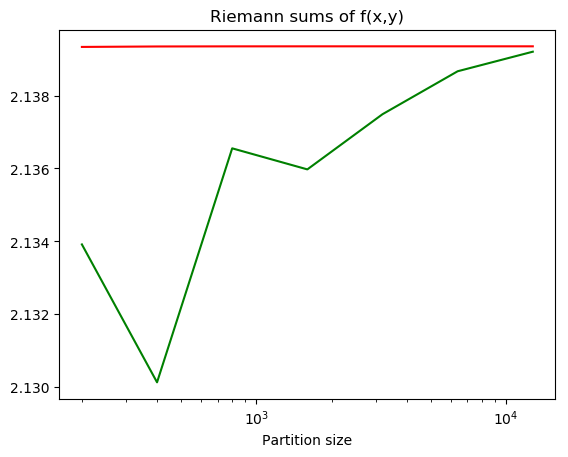

PyObject Text(0.5,1,'Riemann sums of f(x,y)')

In [22]:
S2 =map( num->RiemannSum(f, num, num, uniform_mesh=false), m)
S22=map( num->RiemannSum(f, num, num, uniform_mesh=false, random_selection=true), m)

semilogx(m, S1, "r")
#semilogx(m, S2, "b")
semilogx(m, S22, "g")

xlabel("Partition size")
title("Riemann sums of f(x,y)")

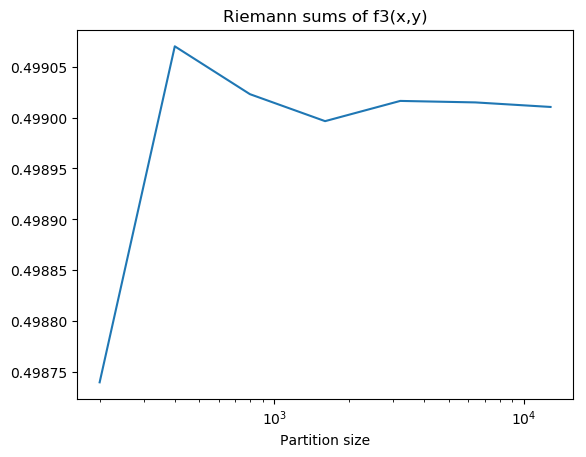

PyObject Text(0.5,1,'Riemann sums of f3(x,y)')

In [11]:
S3=map( num->RiemannSum(f3, num, num), m)
semilogx(m, S3)
xlabel("Partition size")
title("Riemann sums of f3(x,y)")

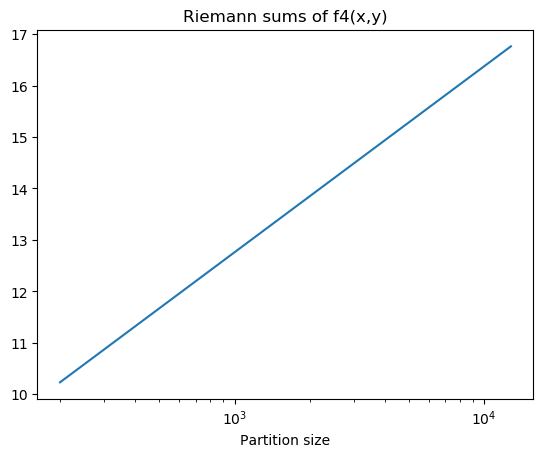

PyObject Text(0.5,1,'Riemann sums of f4(x,y)')

In [12]:
S4=map( num->RiemannSum(f4, num, num), m)
semilogx(m, S4)
xlabel("Partition size")
title("Riemann sums of f4(x,y)")

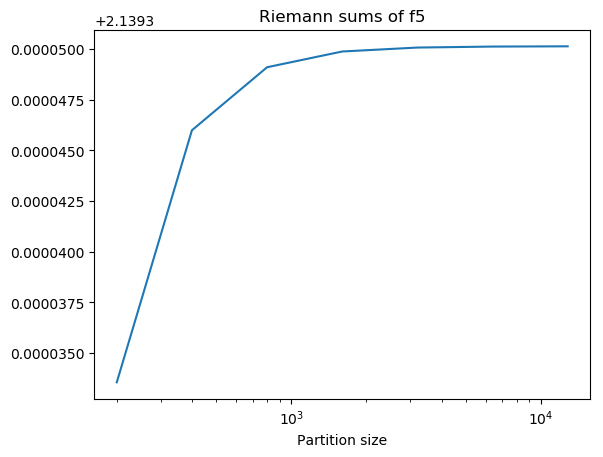

PyObject Text(0.5,1,'Riemann sums of f5')

In [13]:
S5=map( num->RiemannSum(f, num, num), m)
semilogx(m, S5)
xlabel("Partition size")
title("Riemann sums of f5")

**You need to know some important properties of the double integrals.**

* Under which conditions on $D$ and $f$ is $f$ **integrable**? (Theorem 1, p. 818)
    * $D$ is *closed* and *bounded* and whose boundary consists of finite number of curves of finite length
    * $f$ is continuous on $D$
    
(These are of course only sufficient conditions)

* Other important properties are summarized in the box in p.819 (p 794 Ed 7)


## Chap 14.2 Iteration of double integrals in Cartesian Coordinates

**Reduce a double integral into a series of one-variable integrals.**

$D$ is the region bounded by $a\le x\le b$ and $c(x)\le y \le d(x)$. ($D$ is an $x$-simple domain)

$$ \int\int_D f(x,y) dA \equiv \int_a^b dx \int_{c(x)}^{d(x)} f(x,y) dy = \int_a^b \left( \int_{c(x)}^{d(x)} f(x,y) dy\right) dx $$

* You see that for each value of $x$, the integral in $y$ is a one-variable integral, and can be regarded as a function of $x$:

$$ I(x):=\int_{c(x)}^{d(x)} f(x,y) dy $$

So 

$$ \int\int_D f(x,y) dA = \int_a^b I(x) dx $$


Similarly, if $D$ is the region bounded by $c\le y \le d$ and $a(y)\le x \le b(y)$ ($D$ is an $y$-simple domain)

$$ \int\int_D f(x,y) dA \equiv \int_c^d dy \int_{a(y)}^{b(y)} f(x,y) dx = \int_c^d \left( \int_{a(y)}^{d(y)} f(x,y) dx\right) dy $$

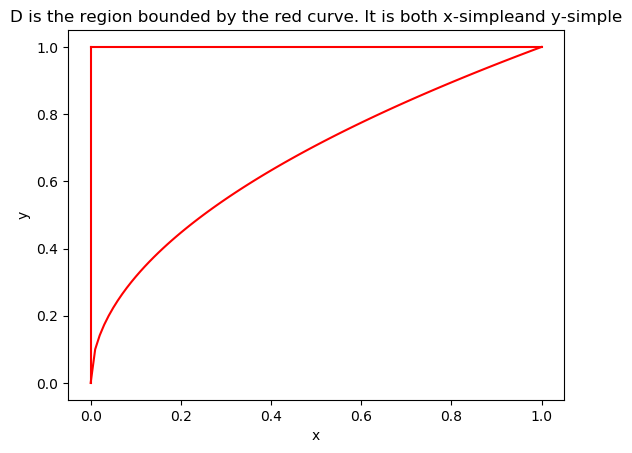

PyObject Text(30.8472,0.5,'y')

In [14]:
x=range(0, stop=1, length=101)

plot( x, sqrt.(x), "r")
plot(x, ones(size(x)), "r")
plot( zeros(size(x)), x, "r")

title("D is the region bounded by the red curve. It is both x-simpleand y-simple")
xlabel("x")
ylabel("y")

In [ ]:
Examples 1,2,3.

## Chap 14.3 Improper integrals and a mean-value theorem

#### Improper integrals
For x-simple and y-simple domains, reduce the integration to one-variable improper integrals.

See Examples 1,2,3

#### A mean value theorem

**Theorem 3** (p.831) (Mean-value theorem)

$D$ is closed, bounded and **connected**, and $f(x,y)$ is continous on $D$.

$\exists (x_0, y_0)\in D$

$$\int\int_D f(x,y) dA = f(x_0, y_0)|D|,~~~~|D|:=\mathrm{area~of}~D$$

**Definition 3** (p 831) The **average** or **mean** value of $f$ over $D$

$$\bar f:=\frac{1}{|D|}\int\int_D f(x,y) dA$$

## Chap 14.4 Double integrals in polar coordinates

**This is an important and very useful section.**

$$x(r,\theta)=rcos\theta,~~y(r\theta)=r\sin\theta $$

$$r(x,y) = \sqrt{x^2+y^2},~~\theta(x,y)=\arcsin(x/\sqrt{x^2+y^2})$$

We need to **be careful about the range of $\theta$** and make the propriate choice.

Why are we doing this? Some functions and domains are easier to describe in the polar coordinates.

We would like to be able to to the following:

$$\int\int_D f(x(r,\theta),y(r,\theta)) dA = \int\int_D f(r, \theta) J(r,\theta) drd\theta$$

And vice versa.

### relating the area elements defined in different coordinate systems

A uniform partition of the $r$-$\theta$ plane is: $r_i= i\Delta r$, $\theta_j = j\Delta\theta$, $i,j=0,1,\cdots$

The area of a sub-rectangle of this partition on the $r$-$\theta$ plane is:

$$dA^* = \Delta r\Delta \theta$$

Now, throuh $x(r,\theta),y(r,\theta)$, this piece of sub-rectangle becomes a fan on teh xy-plane, and its area 
is

$$ \frac{1}{2}(r+\Delta r)^2\Delta\theta - \frac{1}{2}r^2\Delta \theta = r~\Delta r\Delta \theta+ \frac{1}{2}\Delta r^2\Delta\theta\approx r~\Delta r\Delta \theta$$ 

This gives how the area elements in the Cartesian coordinates and the polar coordinates scale:

$$ \Delta r\Delta\theta=\Delta A^* \xrightarrow{x(r,\theta),y(r,\theta)} \Delta A = (r~\Delta\theta) \Delta r $$

(Can you show that in computing the limit of the Riemann sum, as $\Delta r\rightarrow 0, \Delta\theta\rightarrow 0$, we can ignore the term $\frac{1}{2}\Delta r^2\Delta\theta$?)


**In defining a double integral, it is important to specify which area element is used.**

We have used the area element on the $x$-$y$ plane:

$$ dA=dxdy = r~dr~d\theta $$

If we consider the $r$-$\theta$ plane, 

$$ dA^* = dr~d\theta =\frac{1}{\sqrt{x^2+y^2}}dxdy$$

$$\int\int_{D_{xy}} f(r(x,y),\theta(x,y))~dxdy=\int\int_{\mathrm{polar}(D_{xy})} f(r,\theta)~r~dr~d\theta $$

$$\int\int_{D_{r\theta}} f(r,\theta)~drd\theta=\int\int_{\mathrm{Cartesian}(D_{r\theta})} f(r(x,y),\theta(x,y))~\frac{1}{\sqrt{x^2+y^2}}~dxdy $$

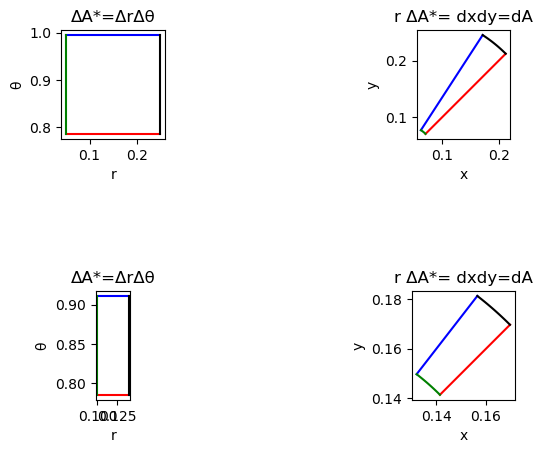

(0.13011617128391148, 0.1715908396848124, 0.1394258050566124, 0.1833279310319485)

In [11]:
t=range(0, stop=1, length=101)
One =ones(size(t))

r0, Δr, θ0, Δθ = 0.05, 0.2, π/4, π/15
#a more "infimitesimal version
#r0, Δr, θ0, Δθ = 0.05, 0.04, π/4, π/65

Rt=r0 .+ Δr .* t
r=r0 .* One

Tt= θ0 .+ Δθ .* t

subplot(3,3,1)
plot( Rt,               θ0 .* One , "r" )
plot( Rt,               (θ0+Δθ) .* One, "b" )
plot( r0 .* One,        Tt      , "g" )
plot( (r0 + Δr) .* One, Tt, "k" )
xlabel("r"); ylabel("θ")
axis("image")
title("ΔA*=ΔrΔθ")

subplot(3,3,3)

x0, y0=r0*cos(θ0), r0*sin(θ0)

plot( x0 .+ Rt.*cos(θ0), y0 .+ Rt.*sin(θ0), "r" )
plot( x0 .+ Rt.*cos(θ0+Δθ), y0 .+ Rt.*sin(θ0+Δθ), "b" )

plot( x0 .+ r0.*cos.(Tt), y0 .+ r0.*sin.(Tt), "g" )
plot( x0 .+ (r0+Δr).*cos.(Tt), y0 .+ (r0+Δr).*sin.(Tt), "k" )
xlabel("x"); ylabel("y")
title("r ΔA*= dxdy=dA")
axis("image")

#a more "infimitesimal version
r0, Δr, θ0, Δθ = 0.1, 0.04, π/4, π/25

Rt=r0 .+ Δr .* t
r=r0 .* One

Tt= θ0 .+ Δθ .* t

subplot(3,3,7)
plot( Rt,               θ0 .* One , "r" )      ## keep θ fixed at θ0, vary the r variable from r0 to r0+Δr
plot( Rt,               (θ0+Δθ) .* One, "b" ) 
plot( r0 .* One,        Tt      , "g" )        ## keep r fixed at r0, vary the θ variable from θ0 to θ0+Δθ
plot( (r0 + Δr) .* One, Tt, "k" )
xlabel("r"); ylabel("θ")
axis("image")
title("ΔA*=ΔrΔθ")

subplot(3,3,9)

x0, y0=r0*cos(θ0), r0*sin(θ0)

plot( x0 .+ Rt.*cos(θ0), y0 .+ Rt.*sin(θ0), "r" )  ## trace out the curve (x(r,θ), y(r,θ)) due to change in (r,θ)
                                                   ## keep θ fixed at θ0, vary the r variable from r0 to r0+Δr


plot( x0 .+ Rt.*cos(θ0+Δθ), y0 .+ Rt.*sin(θ0+Δθ), "b" )

plot( x0 .+ r0.*cos.(Tt), y0 .+ r0.*sin.(Tt), "g" ) ## trace out the curve (x(r,θ), y(r,θ)) due to change in (r,θ)
                                                    ## keep r fixed at r0, vary the θ variable from θ0 to θ0+Δθ

plot( x0 .+ (r0+Δr).*cos.(Tt), y0 .+ (r0+Δr).*sin.(Tt), "k" )
xlabel("x"); ylabel("y")
title("r ΔA*= dxdy=dA")


axis("image")

$$\begin{align} 
dx(u,v,du,dv) &=\frac{\partial x}{\partial u}du+ \frac{\partial x}{\partial v}dv\\
dy(u,v,du,dv) &=\frac{\partial y}{\partial u}du+ \frac{\partial y}{\partial v}dv
\end{align}
$$


Please refer to the code and plots in the cell above:

$$\Delta A^*=\Delta u\Delta dv \rightarrow J dA^* = dA $$

The red segment on the xy-plane: $v$ is held constant, $dv =0$. 

$$\vec{RED}=  dx(u,v,du,0)~\mathbf{i} + dy(u,v,du,0)~\mathbf{j} $$

The green segment on the xy-plane: $u$ is held constant, $du =0$. 

$$\vec{GREEN}=  dx(u,v,0,dv)~\mathbf{i} + dy(u,v,0, dv)~\mathbf{j} $$

The area of the parallelogram defined by $\vec{RED}\times \vec{GREEN}$ and $\vec{GREEN}$ is

$$ dA =\left| \vec{RED}\times \vec{GREEN}\right| = \left| \frac{\partial(x,y)}{\partial(u,v)}\right| dudv.$$


#### For integration, linear approximations of a function "is enough"

$$\mathbf{f}(u,v):= (x(u,v), y(u,v))$$

Linear approximation of $\mathbf{f}$ at $(u_i,v_j)$:

$$\mathbf{f}(u,v) \approx \mathbf{f}(u_i,v_j) + (u-u_i, v-v_j)D\mathbf{f}(u_i,v_j)$$

In [ ]:
Do example 8 (p840) (p815, Ed 7)

### Change of variables formula for double integrals

Conversion from polar coordinates $(r,\theta)$ to Cartesian coordinates $(x,y)$ is a change of variables
described by two functions.

$$\begin{align} x(r,\theta)&=r\cos\theta\\
                y(r,\theta)&=r\sin\theta\end{align} 
                \implies \frac{\partial(x,y)}{\partial(r,\theta)}= \textrm{det}\left(\begin{array}{cc}
\cos\theta & -r\sin\theta\\
\sin\theta & r\cos\theta
\end{array}\right)=r
                $$

Using chain rule, we have 
    $$ \frac{\partial(r,\theta)}{\partial(x,y)}=\frac{1}{\frac{\partial(x,y)}{\partial(r,\theta)}}=\frac{1}{r} $$
        
    
**The absolute value of the Jacobian determines correspond to how area elements in difference coordinate systems relate to each other:**

$$dA = dxdy = \left|\frac{\partial(x,y)}{\partial(r,\theta)}\right| dudv $$

Revisiting the function $f5(x,y):=1/\sqrt(x^2+y^2)$, and the improper integral

$$ \int\int_D \frac{1}{x^2+y^2} dA = \int\int_D \frac{1}{r} r drd\theta = \int\int_D 1 drd\theta $$

**So the part of $dA$ cancels the singularity in f5(x,y)!**

Do Example 4. Then Examples 1, 2.

### Triple integrals

$$\int\int\int_D f(x,y,z) dV$$

Change of variabel formula: $(u,v,w)\mapsto (x,y,z)$

$$\int\int\int_D f(x,y,z) dxdydz = \int\int\int_D f(u,v,w) \left|\frac{\partial(x,y,z)}{\partial(u,v,w)}\right| dudvdw $$

In practice, when we calculate by hands, we always write the integrals into a sequence of one dimensonal integrals. 

For example,
$$\int\int\int_D f(x,y,z) dV = \int_{D_x}\int_{D_y(x)}\int_{D_z(x,y)} f(x,y,z) dzdydx$$

Or via suitable change of vairables $(u,v,w)\mapsto (x,y,z)$

$$\int\int\int_D f(x,y,z) dV= \int\int\int_{D_{uvw}} f( x(u,v,w), y(u,v,w), z(u,v,w) ) J(u,v,w) dudvdw$$

Do Example 2 (p844) (p819, Ed 7), maybe Ex 3.



#### Change of variables in triple integrals


For this course, you need to know the formulas involving
* spherical coordinates
* cylindrical coordinate

## Chap 14.7

### Surface area of the graph of a function

The graph of $f(x,y)$, $\mathcal{S}$, is a surface parameterized by $(x,y)$:

$$ (x,y, f(x,y))\in\mathcal{S} $$

Recall that a unit normal vector of $\mathcal{S}$ can be derived easily as teh normalized gradient of 

$$g(x,y,z):=z-f(x,y) \implies \mathbf{n}(x,y)= \frac{-f_1(x,y)\mathbf{i} -f_2(x,y)\mathbf{j} +\mathbf{k}}{\sqrt{f_1(x,y)^2+f_2(x,y)^2+1}}$$

If we **approximate $\mathcal{S}$ by $(x,y, f(x,y))$ by the tagent plane**, then the surface area element of the tagent plane (which is the same as that of $\mathcal{S}$, denoted by $dS$ is

$$  dA=dxdy = \mathbf{n}\cdot\mathbf{k}~dS $$

$$dS= \sqrt{1+\left(\frac{\partial f}{\partial x}\right)^2+\left(\frac{\partial f}{\partial y}\right)^2} dA$$

In [ ]:
Do Example 1

(0.0, 1.0)